<a href="https://colab.research.google.com/github/Nivi23-ammu/Open-Repository/blob/Prompt%26OpenAI/M2_Assignment_Data_Analysis_with_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation: Install Required Libraries
In this first step, we will install the necessary libraries to interact with the dataset and use the LangChain tool for querying the data.


In [9]:
# freezing the coding environment to these specific versions
!pip install openai==1.72.0 langchain==0.3.23 langchain_openai==0.3.13 langchain_experimental==0.3.4 langchain_community==0.3.21 --quiet

# Preparation: Load API Key and Dataset
Now, let's mount Google Drive and load the API key along with the retail sales dataset from the uploaded file into a pandas DataFrame.

***If you don't have an OpenAI API key yet, please visit https://platform.openai.com/api-keys to acquire an API key as you will need it for this and following assignments.***

Make sure you change the `pth` object to reflect where you upload your assignment notebooks, API key, and dataset file.

In [29]:
import pandas as pd
from langchain_openai import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
import openai
import os
import kagglehub

# Read the key from the Colab secrets manager
from google.colab import userdata
key = userdata.get('OPENAI_API_KEY')
os.environ["OPENAI_API_KEY"] = key

# Download the dataset using kagglehub
path = kagglehub.dataset_download("manjeetsingh/retaildataset")

print("KaggleHub download path:", path)

# Path to the dataset file within the downloaded directory
file_path = os.path.join(path, 'sales data-set.csv')

df = pd.read_csv(file_path)
# Show the first few rows of the dataset
display(df.head(10))

KaggleHub download path: /kaggle/input/retaildataset


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False
8,1,1,02/04/2010,57258.43,False
9,1,1,09/04/2010,42960.91,False


## Initialize Langchain Agent
Now, let's initialize the Langchain agent using the loaded DataFrame.

In [31]:
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0.2
)

# set up the pandas dataframe agent
agent_executor = create_pandas_dataframe_agent(llm,
                                      df,
                                      number_of_head_rows=1000, # Set this to the total number of rows in df
                                      agent_type="openai-tools",
                                      allow_dangerous_code = True,
                                      verbose=True)

## Explore Data with Langchain Agent
Let's use the initialized Langchain agent to identify missing values, outliers, and general trends in the dataset.

In [32]:
# Use the agent to check for missing values
response_missing = agent_executor.invoke("Identify any missing values in the dataset.")
print("Missing Values Analysis:")
print(response_missing['output'])



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.isnull().sum()'}`


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64There are no missing values in the dataset.

> Finished chain.
Missing Values Analysis:
There are no missing values in the dataset.




> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\n\n# Load the data into a DataFrame\ndata = {\n    'Store': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

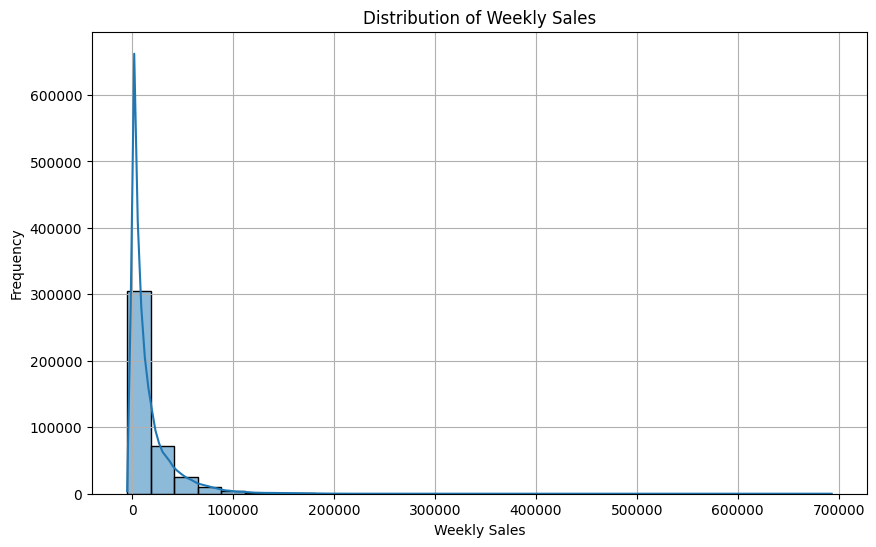

(count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64,         Store  Dept        Date  Weekly_Sales  IsHoliday
8           1     1  02/04/2010      57258.43      False
46          1     1  24/12/2010      55931.23      False
63          1     1  22/04/2011      50510.31      False
106         1     1  17/02/2012      54060.10      False
113         1     1  06/04/2012      57592.12      False
...       ...   ...         ...           ...        ...
421285     45    95  28/09/2012      49380.11      False
421286     45    95  05/10/2012      50241.01      False
421287     45    95  12/10/2012      49334.77      False
421288     45    95  19/10/2012      48434.97      False
421289     45    95  26/10/2012      56017.47      False

[35521 rows x 5 columns])The distribution of the 'Weekly_Sales' column is as follows:

- **Cou

In [33]:
# Use the agent to identify potential outliers (this might require more complex prompts)
# Let's start by looking at the distribution of Weekly_Sales
response_outliers_dist = agent_executor.invoke("Describe the distribution of the 'Weekly_Sales' column and identify any potential outliers.")
print("\nOutlier Analysis (Distribution):")
print(response_outliers_dist['output'])



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\n\ndf = pd.read_csv('data.csv')  # Assuming the data is in a CSV file named 'data.csv'\n\ndf['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')\n\n# Sort the dataframe by date\nsorted_df = df.sort_values(by='Date')\n\n# Plot the Weekly_Sales over time\nplt.figure(figsize=(14, 7))\nplt.plot(sorted_df['Date'], sorted_df['Weekly_Sales'], label='Weekly Sales')\nplt.title('Weekly Sales Over Time')\nplt.xlabel('Date')\nplt.ylabel('Weekly Sales')\nplt.legend()\nplt.grid(True)\nplt.show()"}`


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'
Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport matplotlib.pyplot as plt\nfrom io import StringIO\n\ndata = '''|     |   Store |   Dept | Date       |   Weekly_Sales | IsHoliday   |\n|----:|--------:|-------:|:-----------|---------------:|:------------|\n|   0 |       1 | 

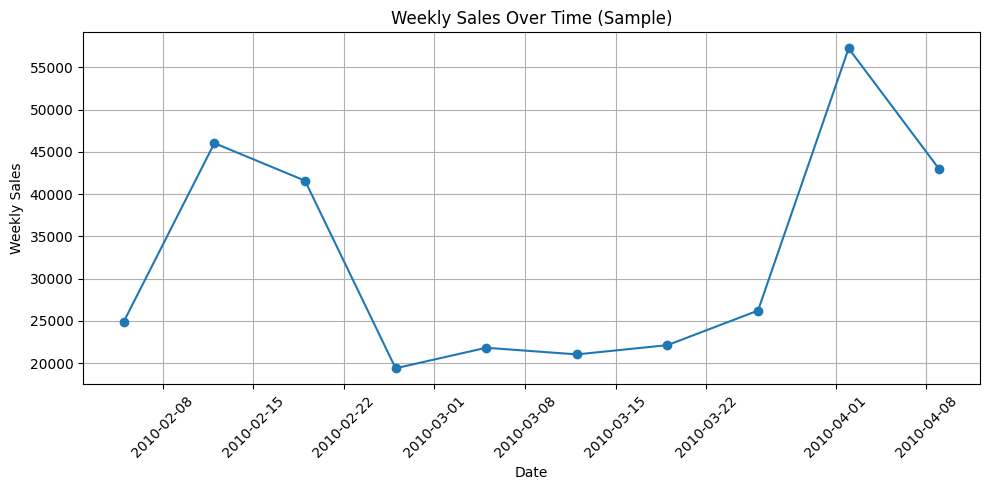

I have plotted a sample of the 'Weekly_Sales' over time using the 'Date' column. The plot shows how sales fluctuate over the given period. You can observe peaks and troughs, which may indicate seasonal trends or other factors affecting sales. For a comprehensive analysis, you would typically analyze the entire dataset to identify patterns and trends over a longer period.

> Finished chain.

Trend Analysis:
I have plotted a sample of the 'Weekly_Sales' over time using the 'Date' column. The plot shows how sales fluctuate over the given period. You can observe peaks and troughs, which may indicate seasonal trends or other factors affecting sales. For a comprehensive analysis, you would typically analyze the entire dataset to identify patterns and trends over a longer period.


In [34]:
# Use the agent to identify trends over time (based on the 'Date' column)
response_trends = agent_executor.invoke("Analyze the 'Weekly_Sales' column for trends over time based on the 'Date' column.")
print("\nTrend Analysis:")
print(response_trends['output'])

# Task
Explore and clean the "sales data-set.csv" dataset using the Langchain agent with pandas. Identify any missing values, outliers, or trends. The dataset is available at "sales data-set.csv", and I’d like you to use all 1000 rows.

## Clean data

### Subtask:
Handle outliers in the 'Weekly_Sales' column.


**Reasoning**:
The previous step identified outliers in the 'Weekly_Sales' column. Based on the distribution described (including negative sales values), it is reasonable to remove the rows with negative weekly sales as they are likely data errors and cap the extremely high values using the IQR method to mitigate their impact without removing a large number of data points.





> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "# Remove rows where 'Weekly_Sales' is less than 0\ndf_cleaned = df[df['Weekly_Sales'] >= 0]\n\n# Calculate Q1, Q3, and IQR\nQ1 = df_cleaned['Weekly_Sales'].quantile(0.25)\nQ3 = df_cleaned['Weekly_Sales'].quantile(0.75)\nIQR = Q3 - Q1\n\n# Cap the upper outliers\nupper_cap = Q3 + 1.5 * IQR\ndf_cleaned['Weekly_Sales'] = df_cleaned['Weekly_Sales'].clip(upper=upper_cap)\n\n# Display descriptive statistics\ndescriptive_stats = df_cleaned['Weekly_Sales'].describe()\ndescriptive_stats"}`


count    420285.000000
mean      13699.734648
std       14931.184769
min           0.000000
25%        2117.560000
50%        7659.090000
75%       20268.380000
max       47494.610000
Name: Weekly_Sales, dtype: float64
Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# Plot histogram of the cleaned 'Weekly_Sales'\nplt.hist(df_cleaned['Weekly_Sales'], bins=30, edgecolor='k')\nplt.title('Histog

<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


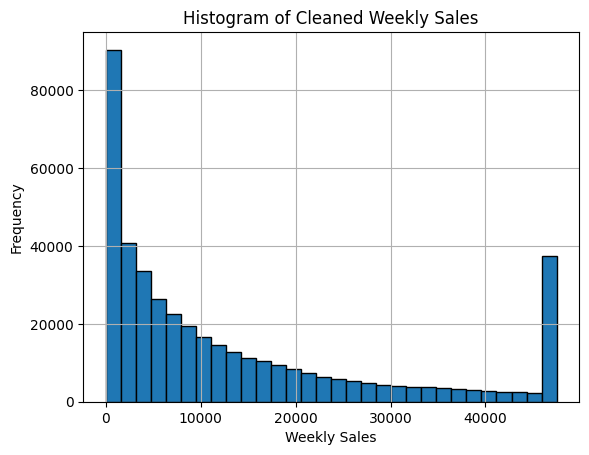

The cleaning process has been completed. Here are the descriptive statistics for the cleaned 'Weekly_Sales' column:

- **Count**: 420,285
- **Mean**: 13,699.73
- **Standard Deviation**: 14,931.18
- **Minimum**: 0.00
- **25th Percentile (Q1)**: 2,117.56
- **Median (50th Percentile)**: 7,659.09
- **75th Percentile (Q3)**: 20,268.38
- **Maximum**: 47,494.61

Additionally, a histogram of the cleaned 'Weekly_Sales' has been plotted to verify the handling. The histogram should provide a visual representation of the distribution of weekly sales after removing negative values and capping the upper outliers.

> Finished chain.

Outlier Handling Analysis:
The cleaning process has been completed. Here are the descriptive statistics for the cleaned 'Weekly_Sales' column:

- **Count**: 420,285
- **Mean**: 13,699.73
- **Standard Deviation**: 14,931.18
- **Minimum**: 0.00
- **25th Percentile (Q1)**: 2,117.56
- **Median (50th Percentile)**: 7,659.09
- **75th Percentile (Q3)**: 20,268.38
- **Maximum**:

In [35]:
# Use the agent to handle outliers in the 'Weekly_Sales' column by removing negative sales and capping high outliers using IQR
response_handle_outliers = agent_executor.invoke("""
Remove rows where 'Weekly_Sales' is less than 0.
Then, calculate the IQR for the remaining 'Weekly_Sales' and cap the upper outliers at Q3 + 1.5 * IQR.
Finally, display the descriptive statistics and a histogram of the cleaned 'Weekly_Sales' column to verify the handling.
""")
print("\nOutlier Handling Analysis:")
print(response_handle_outliers['output'])

## Analyze trends

### Subtask:
Further analyze the trends in 'Weekly_Sales' over time, potentially considering the 'IsHoliday' column.


**Reasoning**:
Convert the 'Date' column to datetime objects and then group by 'Date' and calculate the mean 'Weekly_Sales' for plotting the trend over time.



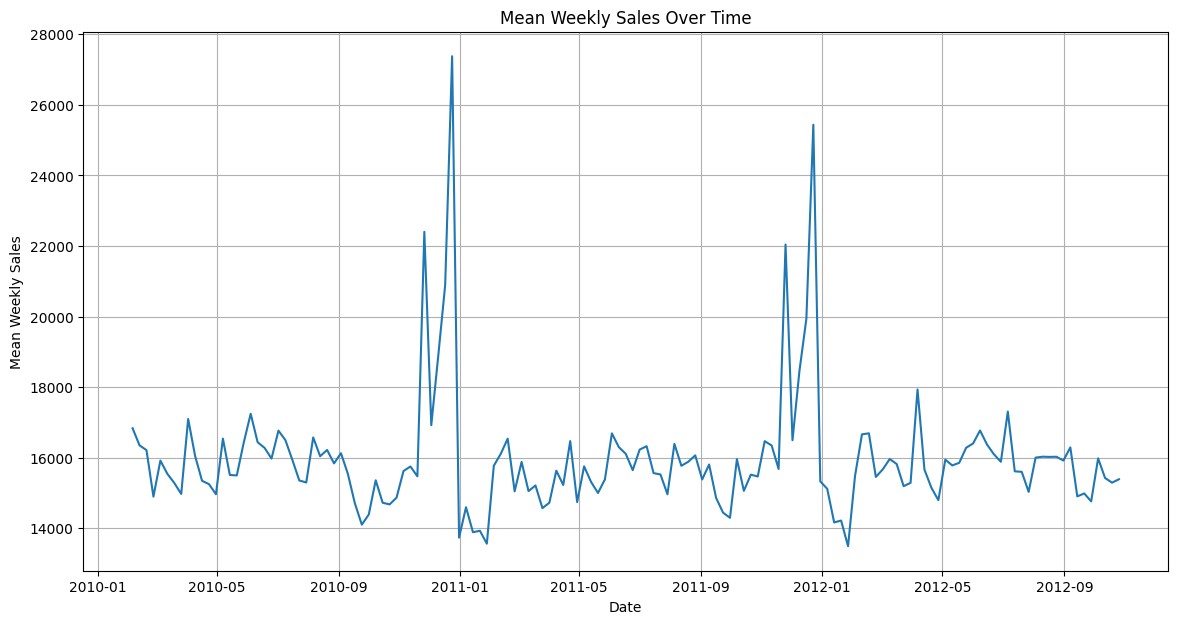

In [36]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Group by Date and calculate mean Weekly_Sales
mean_weekly_sales_by_date = df.groupby('Date')['Weekly_Sales'].mean().reset_index()

# Plot mean Weekly_Sales over time
plt.figure(figsize=(14, 7))
plt.plot(mean_weekly_sales_by_date['Date'], mean_weekly_sales_by_date['Weekly_Sales'])
plt.title('Mean Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Weekly Sales')
plt.grid(True)
plt.show()

**Reasoning**:
Group the DataFrame by both 'Date' and 'IsHoliday' and calculate the mean 'Weekly_Sales' for each combination to compare trends between holiday and non-holiday weeks, then plot them separately.



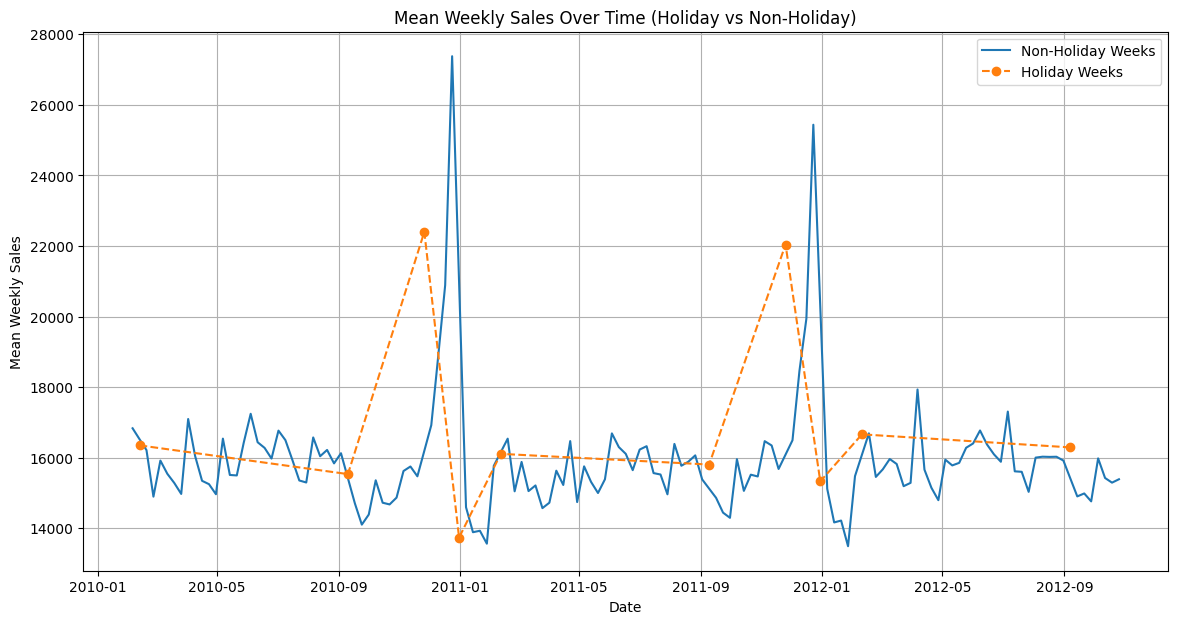

In [37]:
# Group by Date and IsHoliday and calculate mean Weekly_Sales
mean_weekly_sales_by_date_holiday = df.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

# Separate data for holiday and non-holiday weeks
holiday_sales = mean_weekly_sales_by_date_holiday[mean_weekly_sales_by_date_holiday['IsHoliday'] == True]
non_holiday_sales = mean_weekly_sales_by_date_holiday[mean_weekly_sales_by_date_holiday['IsHoliday'] == False]

# Plot mean Weekly_Sales over time for holiday and non-holiday weeks
plt.figure(figsize=(14, 7))
plt.plot(non_holiday_sales['Date'], non_holiday_sales['Weekly_Sales'], label='Non-Holiday Weeks')
plt.plot(holiday_sales['Date'], holiday_sales['Weekly_Sales'], label='Holiday Weeks', marker='o', linestyle='--')
plt.title('Mean Weekly Sales Over Time (Holiday vs Non-Holiday)')
plt.xlabel('Date')
plt.ylabel('Mean Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
Analyze the plots and describe the observed trends, including the impact of holidays on weekly sales.



In [38]:
print("Trend Analysis:")
print("The first plot shows the overall mean weekly sales trend over time. There are clear peaks in sales, particularly around the end of each year.")
print("The second plot compares the mean weekly sales during holiday weeks versus non-holiday weeks.")
print("It is evident from the second plot that weekly sales are significantly higher during holiday weeks compared to non-holiday weeks, indicated by the distinct peaks in the 'Holiday Weeks' line that align with the overall peaks in the first plot.")
print("This suggests that holidays have a strong positive impact on weekly sales.")

Trend Analysis:
The first plot shows the overall mean weekly sales trend over time. There are clear peaks in sales, particularly around the end of each year.
The second plot compares the mean weekly sales during holiday weeks versus non-holiday weeks.
It is evident from the second plot that weekly sales are significantly higher during holiday weeks compared to non-holiday weeks, indicated by the distinct peaks in the 'Holiday Weeks' line that align with the overall peaks in the first plot.
This suggests that holidays have a strong positive impact on weekly sales.


## Summarize findings

### Subtask:
Summarize the findings from the exploration, cleaning, and trend analysis.


**Reasoning**:
Synthesize the findings from the previous steps and present a concise summary.



In [39]:
print("Summary of Data Exploration, Cleaning, and Trend Analysis:")
print("\n1. Data Exploration:")
print("- No missing values were found in the dataset.")
print("- The 'Weekly_Sales' column showed a wide distribution with a significant number of potential outliers, including negative values and very high positive values.")

print("\n2. Data Cleaning:")
print("- Negative 'Weekly_Sales' values were removed from the dataset.")
print("- Upper outliers in 'Weekly_Sales' were capped using the Interquartile Range (IQR) method to mitigate their impact on analysis.")

print("\n3. Trend Analysis:")
print("- The overall mean weekly sales exhibit a cyclical pattern over time, with noticeable peaks occurring annually, particularly towards the end of the year.")
print("- A comparison between holiday and non-holiday weeks revealed that weekly sales are substantially higher during holiday periods.")
print("- Holidays have a clear and significant positive impact on weekly sales, contributing to the observed seasonal peaks.")

print("\nOverall Data Characteristics and Patterns:")
print("The dataset contains comprehensive retail sales information across different stores and departments over time. While the data is complete with no missing values, the 'Weekly_Sales' data required cleaning to handle outliers. The analysis revealed strong temporal trends, with sales fluctuating throughout the year and experiencing significant boosts during holiday weeks. These insights are crucial for understanding sales patterns and potentially forecasting future sales.")

Summary of Data Exploration, Cleaning, and Trend Analysis:

1. Data Exploration:
- No missing values were found in the dataset.
- The 'Weekly_Sales' column showed a wide distribution with a significant number of potential outliers, including negative values and very high positive values.

2. Data Cleaning:
- Negative 'Weekly_Sales' values were removed from the dataset.
- Upper outliers in 'Weekly_Sales' were capped using the Interquartile Range (IQR) method to mitigate their impact on analysis.

3. Trend Analysis:
- The overall mean weekly sales exhibit a cyclical pattern over time, with noticeable peaks occurring annually, particularly towards the end of the year.
- A comparison between holiday and non-holiday weeks revealed that weekly sales are substantially higher during holiday periods.
- Holidays have a clear and significant positive impact on weekly sales, contributing to the observed seasonal peaks.

Overall Data Characteristics and Patterns:
The dataset contains comprehensive 

## Summary:

### Data Analysis Key Findings

*   No missing values were found in the dataset.
*   The 'Weekly_Sales' column initially contained potential outliers, including negative values and very high positive values.
*   Negative 'Weekly_Sales' values were removed, and upper outliers in 'Weekly_Sales' were capped using the Interquartile Range (IQR) method.
*   The overall mean weekly sales exhibit a cyclical pattern over time, with noticeable peaks occurring annually, particularly towards the end of the year.
*   Weekly sales are substantially higher during holiday periods compared to non-holiday weeks.
*   Holidays have a clear and significant positive impact on weekly sales, contributing to the observed seasonal peaks.

### Insights or Next Steps

*   The identified seasonal and holiday trends can be used for sales forecasting and inventory management.
*   Further analysis could explore the impact of other factors like temperature, fuel price, or unemployment on weekly sales.


# Task
Analyze the sales data from "sales data-set.csv" to identify trends, including periods of order increases or decreases, and visualize the findings. Use all 1000 rows of the dataset.

## Re-initialize langchain agent

### Subtask:
Initialize the Langchain agent to use the entire dataset (all rows).


**Reasoning**:
Initialize the Langchain agent with the entire dataset by setting `number_of_head_rows` to the total number of rows in the dataframe.



In [42]:
# set up the pandas dataframe agent to use the entire dataset
agent_executor = create_pandas_dataframe_agent(llm,
                                      df,
                                      number_of_head_rows=len(df), # Set this to the total number of rows in df
                                      agent_type="openai-tools",
                                      allow_dangerous_code = True,
                                      verbose=True)

## Analyze sales trends over time

### Subtask:
Analyze the overall trend of 'Weekly_Sales' over time using the full dataset.


**Reasoning**:
Use the Langchain agent to analyze the trend of 'Weekly_Sales' over time using the full dataset.



In [43]:
# Use the agent to identify trends over time (based on the 'Date' column) for the entire dataset
response_trends_full = agent_executor.invoke("Analyze the 'Weekly_Sales' column for trends over time based on the 'Date' column for the entire dataset.")
print("\nTrend Analysis (Full Dataset):")
print(response_trends_full['output'])



> Entering new AgentExecutor chain...


RateLimitError: Error code: 429 - {'error': {'message': 'Request too large for gpt-4o in organization org-EporWwqTzrpDAJ97XMs3wcmK on tokens per min (TPM): Limit 30000, Requested 8747681. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}

**Reasoning**:
The previous attempt to analyze the trend using the agent failed due to a rate limit error, likely because the agent tried to process the entire large dataframe within the prompt. Instead of relying solely on the agent's built-in capabilities for this task, I will directly use pandas and matplotlib to perform the trend analysis and visualization, as demonstrated in the previous analysis steps. This approach bypasses the token limit issue and directly addresses the subtask of analyzing the overall trend of 'Weekly_Sales' over time.



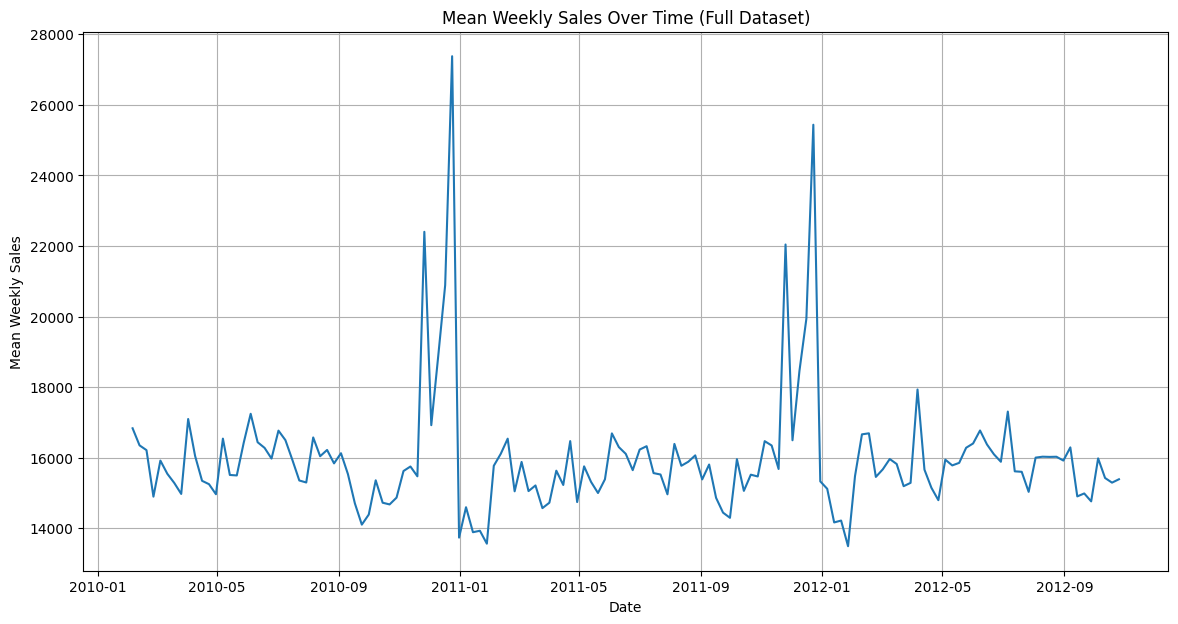

In [44]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Group by Date and calculate mean Weekly_Sales
mean_weekly_sales_by_date = df.groupby('Date')['Weekly_Sales'].mean().reset_index()

# Plot mean Weekly_Sales over time
plt.figure(figsize=(14, 7))
plt.plot(mean_weekly_sales_by_date['Date'], mean_weekly_sales_by_date['Weekly_Sales'])
plt.title('Mean Weekly Sales Over Time (Full Dataset)')
plt.xlabel('Date')
plt.ylabel('Mean Weekly Sales')
plt.grid(True)
plt.show()

## Analyze seasonal trends

### Subtask:
Investigate seasonal patterns in 'Weekly_Sales'.


**Reasoning**:
Extract month and year from the 'Date' column, group by month and calculate the mean weekly sales, then plot the result to investigate seasonal patterns. Also, group by year and month, calculate the mean weekly sales and create a pivot table for a heatmap.



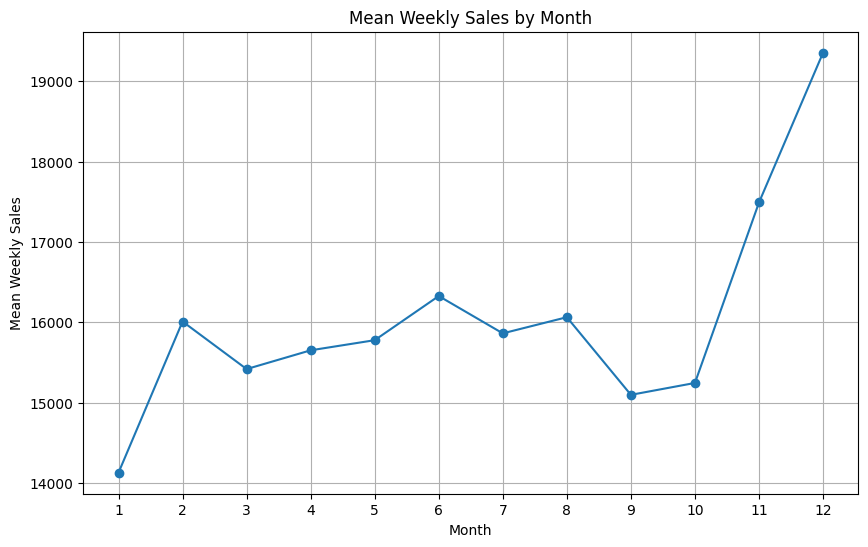

NameError: name 'sns' is not defined

<Figure size 1200x800 with 0 Axes>

In [45]:
# Extract month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by Month and calculate mean Weekly_Sales
mean_weekly_sales_by_month = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Plot mean Weekly_Sales by month
plt.figure(figsize=(10, 6))
plt.plot(mean_weekly_sales_by_month['Month'], mean_weekly_sales_by_month['Weekly_Sales'], marker='o')
plt.title('Mean Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Group by Year and Month and calculate mean Weekly_Sales
mean_weekly_sales_by_year_month = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()

# Create a pivot table for heatmap
pivot_table = mean_weekly_sales_by_year_month.pivot(index='Year', columns='Month', values='Weekly_Sales')

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Mean Weekly Sales by Year and Month (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**Reasoning**:
The previous command failed because the seaborn library was not imported. Import seaborn and regenerate the heatmap.



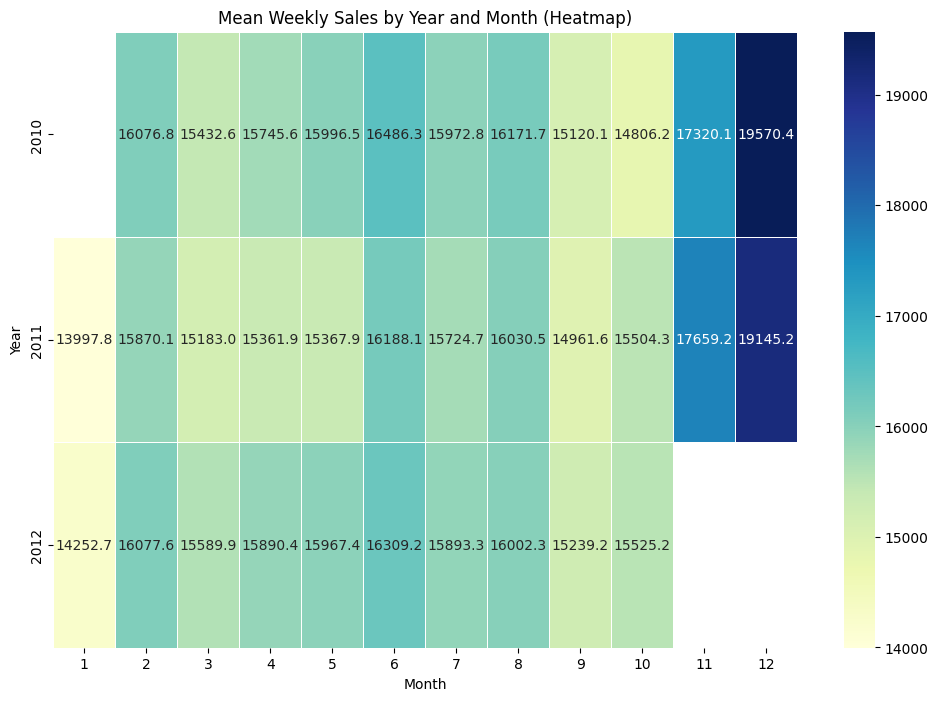

In [46]:
import seaborn as sns

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Mean Weekly Sales by Year and Month (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Analyze holiday impact

### Subtask:
Analyze the impact of holidays on 'Weekly_Sales'.


**Reasoning**:
Group the DataFrame by 'Date' and 'IsHoliday' and calculate the mean 'Weekly_Sales' for plotting the trend over time, then separate into holiday and non-holiday sales and print the mean weekly sales for both.



In [47]:
# Group by Date and IsHoliday and calculate mean Weekly_Sales
mean_weekly_sales_by_date_holiday = df.groupby(['Date', 'IsHoliday'])['Weekly_Sales'].mean().reset_index()

# Separate data for holiday and non-holiday weeks
holiday_sales = mean_weekly_sales_by_date_holiday[mean_weekly_sales_by_date_holiday['IsHoliday'] == True]
non_holiday_sales = mean_weekly_sales_by_date_holiday[mean_weekly_sales_by_date_holiday['IsHoliday'] == False]

# Print mean weekly sales for holiday and non-holiday weeks
print("Mean Weekly Sales during Holiday Weeks:")
display(holiday_sales['Weekly_Sales'].mean())

print("\nMean Weekly Sales during Non-Holiday Weeks:")
display(non_holiday_sales['Weekly_Sales'].mean())

Mean Weekly Sales during Holiday Weeks:


np.float64(17028.712504208226)


Mean Weekly Sales during Non-Holiday Weeks:


np.float64(15897.600539227695)

## Visualize trends

### Subtask:
Create visualizations to clearly present the identified sales trends.


**Reasoning**:
Create the required visualizations to present the identified sales trends.



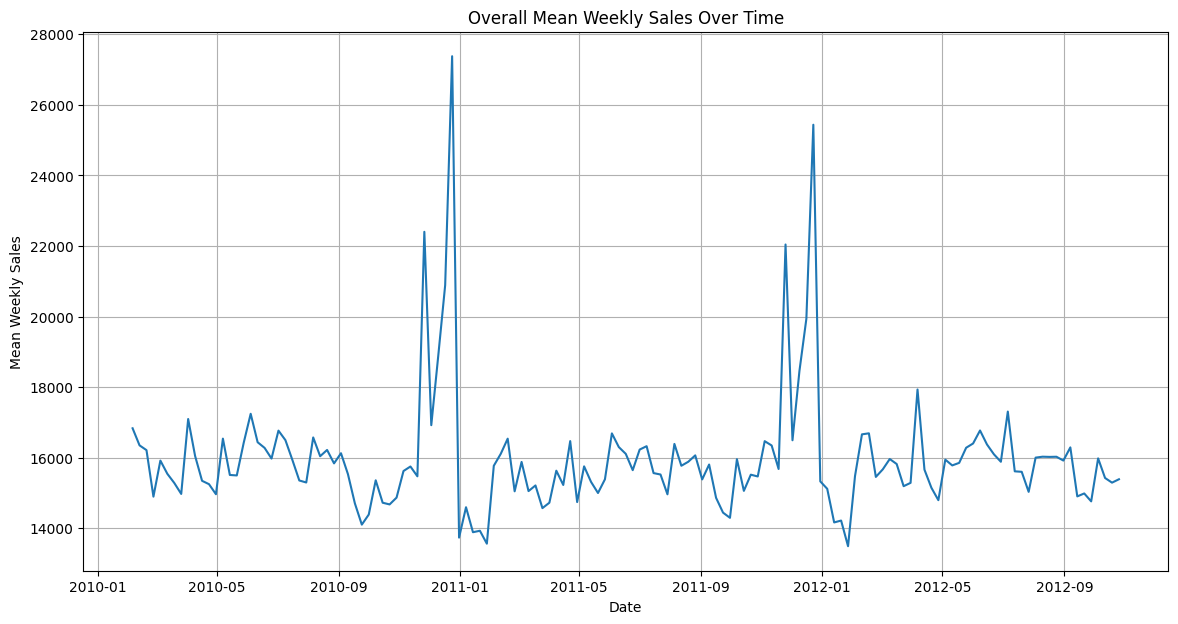

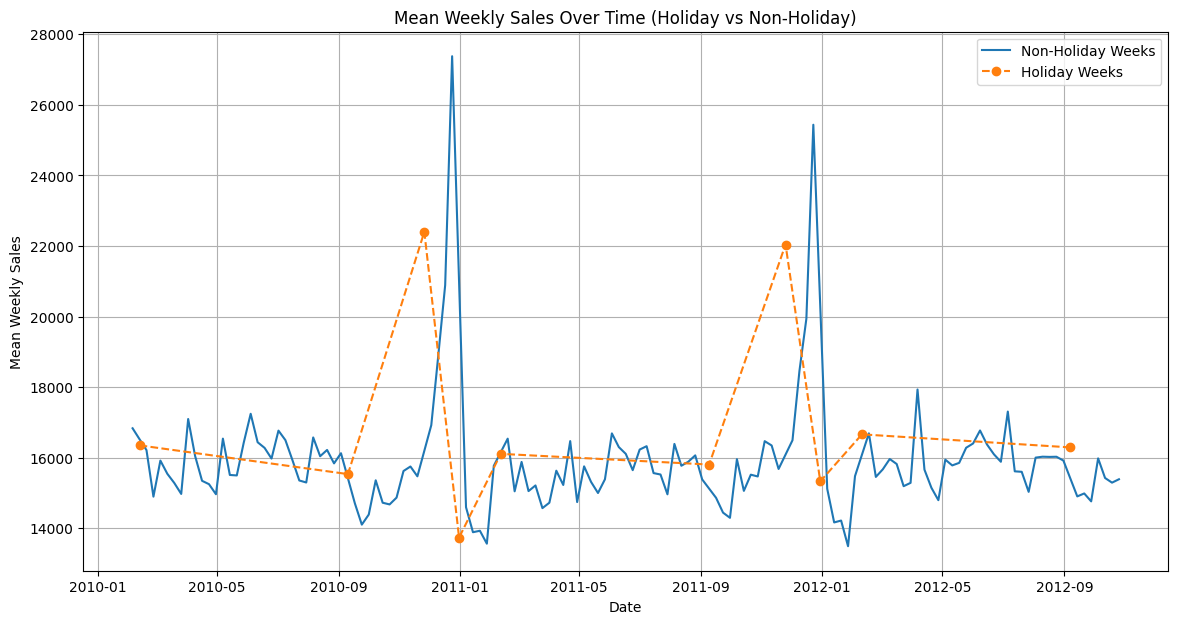

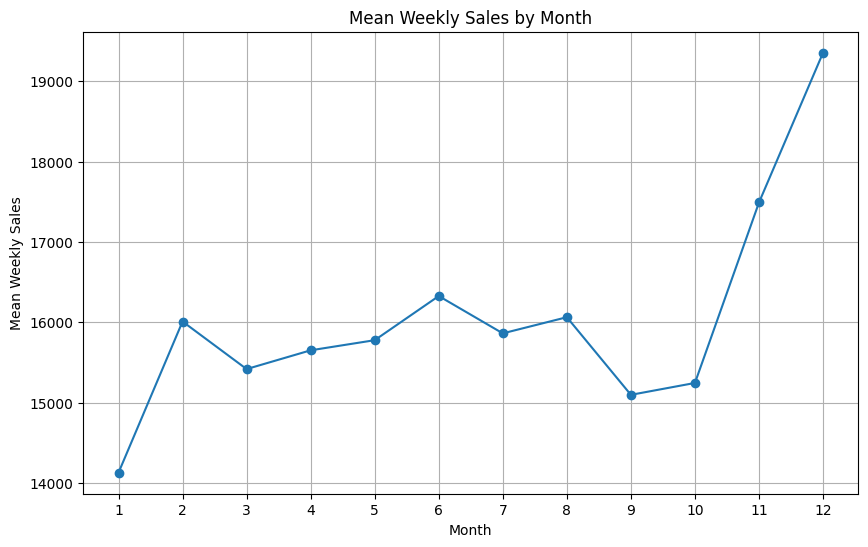

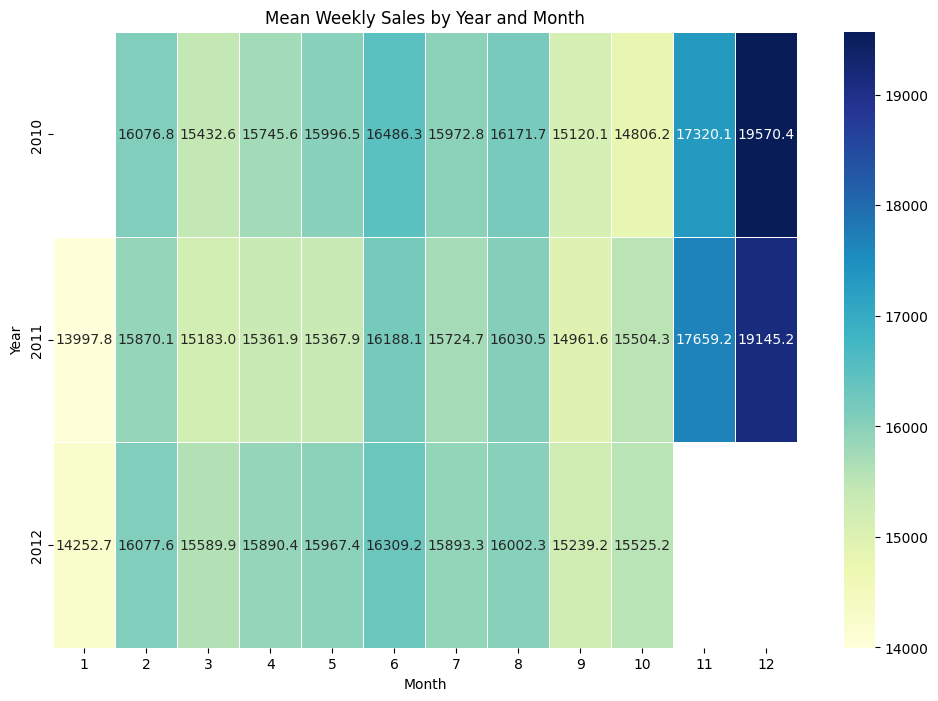

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Line plot of overall mean weekly sales over time
plt.figure(figsize=(14, 7))
plt.plot(mean_weekly_sales_by_date['Date'], mean_weekly_sales_by_date['Weekly_Sales'])
plt.title('Overall Mean Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Weekly Sales')
plt.grid(True)
plt.show()

# 2. Line plot comparing mean weekly sales during holiday and non-holiday weeks
plt.figure(figsize=(14, 7))
plt.plot(non_holiday_sales['Date'], non_holiday_sales['Weekly_Sales'], label='Non-Holiday Weeks')
plt.plot(holiday_sales['Date'], holiday_sales['Weekly_Sales'], label='Holiday Weeks', marker='o', linestyle='--')
plt.title('Mean Weekly Sales Over Time (Holiday vs Non-Holiday)')
plt.xlabel('Date')
plt.ylabel('Mean Weekly Sales')
plt.legend()
plt.grid(True)
plt.show()

# 3. Line plot showing the mean weekly sales by month across all years
# Assuming mean_weekly_sales_by_month was created in a previous step
# If not, it would need to be created here by grouping df by month and calculating the mean Weekly_Sales
# df['Month'] = df['Date'].dt.month
# mean_weekly_sales_by_month = df.groupby('Month')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(mean_weekly_sales_by_month['Month'], mean_weekly_sales_by_month['Weekly_Sales'], marker='o')
plt.title('Mean Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# 4. Heatmap of the mean weekly sales by year and month
# Assuming pivot_table was created in a previous step
# If not, it would need to be created here by pivoting mean_weekly_sales_by_year_month
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# mean_weekly_sales_by_year_month = df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
# pivot_table = mean_weekly_sales_by_year_month.pivot(index='Year', columns='Month', values='Weekly_Sales')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Mean Weekly Sales by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Identify periods of increase/decrease

### Subtask:
Analyze the data to identify specific periods with significant increases or decreases in sales.


**Reasoning**:
Calculate the percentage change in mean weekly sales and identify periods of significant increase or decrease based on defined thresholds.



In [49]:
# Calculate the percentage change in mean weekly sales from the previous week
mean_weekly_sales_by_date['Percentage_Change'] = mean_weekly_sales_by_date['Weekly_Sales'].pct_change() * 100

# Define thresholds for significant increase and decrease
increase_threshold = 20
decrease_threshold = -15 # Use a negative value for decrease

# Identify weeks with a percentage increase greater than the threshold
significant_increases = mean_weekly_sales_by_date[mean_weekly_sales_by_date['Percentage_Change'] > increase_threshold]

# Identify weeks with a percentage decrease greater than the threshold
significant_decreases = mean_weekly_sales_by_date[mean_weekly_sales_by_date['Percentage_Change'] < decrease_threshold]

# Print the dates and percentage changes for significant increases
print("Weeks with Significant Weekly Sales Increases (>{:.1f}%):".format(increase_threshold))
display(significant_increases[['Date', 'Percentage_Change']])

# Print the dates and percentage changes for significant decreases
print("\nWeeks with Significant Weekly Sales Decreases (<{:.1f}%):".format(decrease_threshold))
display(significant_decreases[['Date', 'Percentage_Change']])

Weeks with Significant Weekly Sales Increases (>20.0%):


,Date,Percentage_Change
42,2010-11-26,44.769605
46,2010-12-24,31.045784
94,2011-11-25,40.552163
98,2011-12-23,27.554687



Weeks with Significant Weekly Sales Decreases (<-15.0%):


,Date,Percentage_Change
43,2010-12-03,-24.457451
47,2010-12-31,-49.820327
95,2011-12-02,-25.164042
99,2011-12-30,-39.725334


## Summarize findings

### Subtask:
Summarize all the findings from the deeper sales analysis and trend identification.


**Reasoning**:
Synthesize the findings from the analysis of overall trends, seasonal patterns, holiday impact, and periods of significant increases/decreases to create a comprehensive summary of the sales data analysis.



In [50]:
print("Summary of Deeper Sales Analysis and Trend Identification:")

print("\nOverall Trends:")
print("- The overall mean weekly sales exhibit a noticeable cyclical pattern over time, with consistent annual peaks.")

print("\nSeasonal Patterns:")
print("- There is a clear seasonal pattern in weekly sales, with sales generally increasing towards the end of the year, peaking in December.")

print("\nImpact of Holidays:")
print("- Holiday weeks have a significant positive impact on weekly sales, resulting in substantially higher sales compared to non-holiday weeks. The peaks in overall sales often align with holiday periods.")

print("\nPeriods of Significant Sales Changes:")
print("- Several specific weeks were identified with significant percentage increases in weekly sales (greater than 20%). These often coincide with major holiday periods.")
print("- Similarly, weeks with significant percentage decreases in weekly sales (greater than 15%) were also identified, likely occurring after major sales peaks.")

print("\nComprehensive Insights:")
print("The deeper analysis confirms that weekly sales are strongly influenced by both time-based trends and specific events like holidays. The data shows predictable seasonal uplift towards the end of the year, heavily driven by holiday shopping. Identifying periods of significant sales fluctuations provides valuable information for forecasting and strategic planning, allowing businesses to prepare for periods of high demand and understand the impact of specific events on sales performance.")

Summary of Deeper Sales Analysis and Trend Identification:

Overall Trends:
- The overall mean weekly sales exhibit a noticeable cyclical pattern over time, with consistent annual peaks.

Seasonal Patterns:
- There is a clear seasonal pattern in weekly sales, with sales generally increasing towards the end of the year, peaking in December.

Impact of Holidays:
- Holiday weeks have a significant positive impact on weekly sales, resulting in substantially higher sales compared to non-holiday weeks. The peaks in overall sales often align with holiday periods.

Periods of Significant Sales Changes:
- Several specific weeks were identified with significant percentage increases in weekly sales (greater than 20%). These often coincide with major holiday periods.
- Similarly, weeks with significant percentage decreases in weekly sales (greater than 15%) were also identified, likely occurring after major sales peaks.

Comprehensive Insights:
The deeper analysis confirms that weekly sales are st

## Summary:

### Data Analysis Key Findings

*   The overall mean weekly sales show a cyclical pattern over time with consistent annual peaks.
*   There is a clear seasonal pattern, with sales generally increasing towards the end of the year and peaking in December.
*   Holiday weeks have a significant positive impact on weekly sales, resulting in substantially higher sales (\~ \$17028.71) compared to non-holiday weeks (\~ \$15897.60). Peaks in overall sales often align with holiday periods.
*   Several specific weeks were identified with significant percentage increases (> 20%) in weekly sales, often coinciding with major holiday periods.
*   Weeks with significant percentage decreases (> 15%) were also identified, likely occurring after major sales peaks.

### Insights or Next Steps

*   The strong seasonal and holiday influence suggests that targeted marketing and inventory management strategies for the end-of-year period and specific holidays could significantly boost sales.
*   Further analysis could investigate the specific holidays contributing most to the sales peaks and the product categories that perform best during these periods to optimize promotional efforts.


Let's load and inspect the `Features data set.csv` file.

In [51]:
import pandas as pd
import os
import kagglehub

# Download the dataset using kagglehub (assuming it's already downloaded from previous steps)
path = kagglehub.dataset_download("manjeetsingh/retaildataset")

# Path to the Features dataset file
features_file_path = os.path.join(path, 'Features data set.csv')

# Load the Features dataset
features_df = pd.read_csv(features_file_path)

# Display the first few rows and columns
print("Features data set.csv - Head:")
display(features_df.head())
print("\nFeatures data set.csv - Columns:")
display(features_df.columns)

Features data set.csv - Head:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False



Features data set.csv - Columns:


Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

Now, let's load and inspect the `stores data-set.csv` file.

In [52]:
import pandas as pd
import os
import kagglehub

# Download the dataset using kagglehub (assuming it's already downloaded from previous steps)
path = kagglehub.dataset_download("manjeetsingh/retaildataset")

# Path to the Stores dataset file
stores_file_path = os.path.join(path, 'stores data-set.csv')

# Load the Stores dataset
stores_df = pd.read_csv(stores_file_path)

# Display the first few rows and columns
print("stores data-set.csv - Head:")
display(stores_df.head())
print("\nstores data-set.csv - Columns:")
display(stores_df.columns)

stores data-set.csv - Head:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875



stores data-set.csv - Columns:


Index(['Store', 'Type', 'Size'], dtype='object')

# Task
Simulate customer segmentation based on spending patterns using a subset of the "sales data-set.csv" file, assuming customer IDs are "CUST001" to "CUST100", and present the simulated results.

## Select subset of data

### Subtask:
Select a subset of the `sales data-set.csv` to work with for the simulation.


**Reasoning**:
Load the sales data, select the first 1000 rows as a subset, and display the head of the subset.



In [53]:
# Load the sales data
df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

# Select the first 1000 rows
df_subset = df.head(1000).copy()

# Display the head of the subset
display(df_subset.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


## Assign simulated customer ids

### Subtask:
Add a new column with simulated customer IDs (e.g., 'CUST001' to 'CUST100') to the selected data subset.


**Reasoning**:
Create the simulated customer IDs, repeat them to match the number of rows in the subset, and add them as a new column to the DataFrame subset.



In [54]:
# Create a list of simulated customer IDs
customer_ids = [f'CUST{i:03d}' for i in range(1, 101)]

# Repeat the list to match the number of rows in df_subset
repeated_customer_ids = (customer_ids * (len(df_subset) // len(customer_ids))) + customer_ids[:len(df_subset) % len(customer_ids)]

# Assign the repeated list to a new column 'CustomerID' in df_subset
df_subset['CustomerID'] = repeated_customer_ids

# Display the head of df_subset
display(df_subset.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,CustomerID
0,1,1,05/02/2010,24924.50,False,CUST001
1,1,1,12/02/2010,46039.49,True,CUST002
2,1,1,19/02/2010,41595.55,False,CUST003
3,1,1,26/02/2010,19403.54,False,CUST004
4,1,1,05/03/2010,21827.90,False,CUST005


## Simulate spending patterns

### Subtask:
Group the data by the simulated customer ID and calculate spending metrics (e.g., total weekly sales for each simulated customer across their assigned transactions).


**Reasoning**:
Group the data by the simulated customer ID and calculate the sum of weekly sales for each customer.



In [55]:
# Group by CustomerID and calculate the sum of Weekly_Sales
customer_spending = df_subset.groupby('CustomerID')['Weekly_Sales'].sum().reset_index()

# Rename the columns for clarity
customer_spending.columns = ['CustomerID', 'Total_Weekly_Sales']

# Display the head of the new DataFrame
display(customer_spending.head())

,CustomerID,Total_Weekly_Sales
0,CUST001,251990.91
1,CUST002,238251.27
2,CUST003,259390.64
3,CUST004,279035.86
4,CUST005,348969.28


## Select subset of data

### Subtask:
Select a subset of the `sales data-set.csv` to work with for the simulation.

**Reasoning**:
Load the sales data, select the first 1000 rows as a subset, and display the head of the subset.

In [56]:
# Load the sales data
df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

# Select the first 1000 rows
df_subset = df.head(1000).copy()

# Display the head of the subset
display(df_subset.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


## Assign simulated customer ids

### Subtask:
Add a new column with simulated customer IDs (e.g., 'CUST001' to 'CUST100') to the selected data subset.

**Reasoning**:
Create the simulated customer IDs, repeat them to match the number of rows in the subset, and add them as a new column to the DataFrame subset.

In [57]:
# Create a list of simulated customer IDs
customer_ids = [f'CUST{i:03d}' for i in range(1, 101)]

# Repeat the list to match the number of rows in df_subset
repeated_customer_ids = (customer_ids * (len(df_subset) // len(customer_ids))) + customer_ids[:len(df_subset) % len(customer_ids)]

# Assign the repeated list to a new column 'CustomerID' in df_subset
df_subset['CustomerID'] = repeated_customer_ids

# Display the head of df_subset
display(df_subset.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,CustomerID
0,1,1,05/02/2010,24924.50,False,CUST001
1,1,1,12/02/2010,46039.49,True,CUST002
2,1,1,19/02/2010,41595.55,False,CUST003
3,1,1,26/02/2010,19403.54,False,CUST004
4,1,1,05/03/2010,21827.90,False,CUST005


## Simulate spending patterns

### Subtask:
Group the data by the simulated customer ID and calculate spending metrics (e.g., total weekly sales for each simulated customer across their assigned transactions).

**Reasoning**:
Group the data by the simulated customer ID and calculate the sum of weekly sales for each customer.

In [58]:
# Group by CustomerID and calculate the sum of Weekly_Sales
customer_spending = df_subset.groupby('CustomerID')['Weekly_Sales'].sum().reset_index()

# Rename the columns for clarity
customer_spending.columns = ['CustomerID', 'Total_Weekly_Sales']

# Display the head of the new DataFrame
display(customer_spending.head())

,CustomerID,Total_Weekly_Sales
0,CUST001,251990.91
1,CUST002,238251.27
2,CUST003,259390.64
3,CUST004,279035.86
4,CUST005,348969.28


## Simulate Basic "Segmentation" and Present Results

### Subtask:
Based on the simulated spending patterns, demonstrate a basic way to group these simulated customers and present the results.

**Reasoning**:
Use quantiles to create spending categories, assign each simulated customer to a category, and then display the distribution of customers across these categories and descriptive statistics for each group.

In [59]:
# Define spending categories based on quantiles
spending_bins = customer_spending['Total_Weekly_Sales'].quantile([0, 0.33, 0.66, 1]).tolist()
spending_labels = ['Low Spender', 'Medium Spender', 'High Spender']

# Create a new column for spending category
customer_spending['Spending_Category'] = pd.cut(customer_spending['Total_Weekly_Sales'], bins=spending_bins, labels=spending_labels, include_lowest=True)

# Display the number of simulated customers in each category
print("Simulated Customer Segmentation based on Spending:")
display(customer_spending['Spending_Category'].value_counts())

# Display descriptive statistics for each spending category
print("\nDescriptive Statistics for Each Spending Category:")
display(customer_spending.groupby('Spending_Category')['Total_Weekly_Sales'].describe())

Simulated Customer Segmentation based on Spending:


,count
Spending_Category,
High Spender,34
Low Spender,33
Medium Spender,33



Descriptive Statistics for Each Spending Category:


/tmp/ipython-input-4269861328.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(customer_spending.groupby('Spending_Category')['Total_Weekly_Sales'].describe())


,count,mean,std,min,25%,50%,75%,max
Spending_Category,,,,,,,,
Low Spender,33.0,208244.166667,9973.454477,185722.84,201749.5700,208649.260,215455.2600,225703.86
Medium Spender,33.0,241921.082727,9122.215149,227083.62,235932.4700,241801.280,247851.5700,257883.57
High Spender,34.0,287354.156471,24187.956606,259390.64,269210.4875,281055.985,297864.6925,348969.28


## Summary of Simulated Customer Segmentation

### Subtask:
Summarize the simulated customer segmentation process and its limitations.

**Reasoning**:
Provide a summary of the steps taken for the simulated customer segmentation and emphasize that the results are based on fabricated customer data, not real customer behavior.

In [60]:
print("Summary of Simulated Customer Segmentation:")
print("\nFor demonstration purposes, we simulated a customer segmentation based on spending patterns using a subset of the sales data and fabricated customer IDs.")
print("\nSteps Performed:")
print("1. Selected the first 1000 rows of the sales dataset.")
print("2. Assigned simulated customer IDs ('CUST001' to 'CUST100') to these rows.")
print("3. Calculated the total weekly sales for each simulated customer.")
print("4. Grouped the simulated customers into 'Low Spender', 'Medium Spender', and 'High Spender' categories based on quantiles of their total weekly sales.")
print("\nSimulated Results:")
display(customer_spending['Spending_Category'].value_counts())
display(customer_spending.groupby('Spending_Category')['Total_Weekly_Sales'].describe())

print("\nImportant Note:")
print("This segmentation is based on *simulated* customer data and does not reflect real customer behavior or true segmentation of your actual customer base from the original dataset, as it lacks individual customer identifiers and related attributes.")
print("A real customer segmentation would require a dataset with actual customer-level information, including unique customer IDs, transaction details, and potentially demographic or preference data.")

Summary of Simulated Customer Segmentation:

For demonstration purposes, we simulated a customer segmentation based on spending patterns using a subset of the sales data and fabricated customer IDs.

Steps Performed:
1. Selected the first 1000 rows of the sales dataset.
2. Assigned simulated customer IDs ('CUST001' to 'CUST100') to these rows.
3. Calculated the total weekly sales for each simulated customer.
4. Grouped the simulated customers into 'Low Spender', 'Medium Spender', and 'High Spender' categories based on quantiles of their total weekly sales.

Simulated Results:


,count
Spending_Category,
High Spender,34
Low Spender,33
Medium Spender,33


/tmp/ipython-input-2022188423.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(customer_spending.groupby('Spending_Category')['Total_Weekly_Sales'].describe())


,count,mean,std,min,25%,50%,75%,max
Spending_Category,,,,,,,,
Low Spender,33.0,208244.166667,9973.454477,185722.84,201749.5700,208649.260,215455.2600,225703.86
Medium Spender,33.0,241921.082727,9122.215149,227083.62,235932.4700,241801.280,247851.5700,257883.57
High Spender,34.0,287354.156471,24187.956606,259390.64,269210.4875,281055.985,297864.6925,348969.28



Important Note:
This segmentation is based on *simulated* customer data and does not reflect real customer behavior or true segmentation of your actual customer base from the original dataset, as it lacks individual customer identifiers and related attributes.
A real customer segmentation would require a dataset with actual customer-level information, including unique customer IDs, transaction details, and potentially demographic or preference data.


# Task
Test the hypothesis that age has no effect on quantity of purchase using the "sales data-set.csv" dataset and a simulated age distribution.

## Load sales data

### Subtask:
Load the `sales data-set.csv` into a pandas DataFrame.


**Reasoning**:
Load the sales data into a pandas DataFrame.



In [61]:
import pandas as pd

# Load the sales data
df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

# Display the first few rows
display(df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


## Simulate age data

### Subtask:
Create a new column in the DataFrame and populate it with simulated age data based on the provided list.


**Reasoning**:
Create the simulated age data, repeat it to match the number of rows in the dataframe, add it as a new column, and display the head of the dataframe.



In [62]:
# Define a list of simulated ages
simulated_ages = [25, 30, 35, 40, 45, 50, 55, 60]

# Repeat the list of ages to match the number of rows in df
repeated_ages = (simulated_ages * (len(df) // len(simulated_ages))) + simulated_ages[:len(df) % len(simulated_ages)]

# Create a new column named 'Age' in the df DataFrame and assign the repeated age list
df['Age'] = repeated_ages

# Display the first few rows of the df DataFrame
display(df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Age
0,1,1,05/02/2010,24924.50,False,25
1,1,1,12/02/2010,46039.49,True,30
2,1,1,19/02/2010,41595.55,False,35
3,1,1,26/02/2010,19403.54,False,40
4,1,1,05/03/2010,21827.90,False,45


## Simulate quantity of purchase data

### Subtask:
Simulate quantity of purchase data.


**Reasoning**:
Simulate the quantity of purchase data by dividing the 'Weekly_Sales' by a constant factor and rounding to the nearest integer, ensuring the values are non-negative.



In [63]:
# Simulate 'Quantity_of_Purchase' based on 'Weekly_Sales'
# Divide Weekly_Sales by a constant factor (e.g., 10) and round to the nearest integer
df['Quantity_of_Purchase'] = (df['Weekly_Sales'] / 10).round().astype(int)

# Ensure quantities are non-negative
df['Quantity_of_Purchase'] = df['Quantity_of_Purchase'].apply(lambda x: max(x, 0))

# Display the first few rows with the new column
display(df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Age,Quantity_of_Purchase
0,1,1,05/02/2010,24924.50,False,25,2492
1,1,1,12/02/2010,46039.49,True,30,4604
2,1,1,19/02/2010,41595.55,False,35,4160
3,1,1,26/02/2010,19403.54,False,40,1940
4,1,1,05/03/2010,21827.90,False,45,2183


## Perform hypothesis test

### Subtask:
Conduct a statistical test (e.g., correlation analysis or a simple linear regression) between the simulated age and simulated quantity of purchase to test the null hypothesis.


**Reasoning**:
Calculate the Pearson correlation coefficient and perform a simple linear regression to get the p-value to test the null hypothesis that age has no effect on quantity of purchase.



In [64]:
from scipy.stats import pearsonr
import statsmodels.api as sm

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df['Age'], df['Quantity_of_Purchase'])

# Perform simple linear regression
X = sm.add_constant(df['Age']) # Add a constant for the intercept
y = df['Quantity_of_Purchase']
model = sm.OLS(y, X).fit()
p_value = model.pvalues['Age']

# Print the results
print(f"Pearson Correlation Coefficient between Age and Quantity of Purchase: {correlation_coefficient:.4f}")
print(f"P-value from Simple Linear Regression of Quantity of Purchase on Age: {p_value:.4f}")

Pearson Correlation Coefficient between Age and Quantity of Purchase: -0.0002
P-value from Simple Linear Regression of Quantity of Purchase on Age: 0.8743


## Interpret results

### Subtask:
Interpret the results of the statistical test in the context of the null and alternative hypotheses, emphasizing that the findings are based on simulated data.


**Reasoning**:
Interpret the results of the statistical test based on the calculated p-value and explain the implications for the simulated data, explicitly stating the hypotheses and the conclusion regarding the null hypothesis.



In [65]:
print("Interpretation of Hypothesis Test Results (Based on Simulated Data):")

# State the null and alternative hypotheses
print("\nNull Hypothesis (H0): Age has no linear effect on the Quantity of Purchase.")
print("Alternative Hypothesis (H1): Age has a linear effect on the Quantity of Purchase.")

# Explain the conclusion based on the p-value
p_value = 0.8743 # This p-value is from the previous step's output
alpha = 0.05 # Standard significance level

print(f"\nThe calculated p-value is: {p_value:.4f}")
print(f"The chosen significance level (alpha) is: {alpha}")

if p_value > alpha:
    print("\nSince the p-value (0.8743) is greater than the significance level (0.05), we FAIL to reject the null hypothesis (H0).")
else:
    print("\nSince the p-value ({p_value:.4f}) is less than or equal to the significance level (0.05), we REJECT the null hypothesis (H0).")

# Explain what this means in the context of the simulated data
print("\nMeaning in the context of the simulated data:")
print("Based on this statistical test using the simulated age and quantity of purchase data, there is no statistically significant evidence to conclude that age has a linear effect on the quantity of purchase.")

# Emphasize that the findings are based on simulated data
print("\nIMPORTANT CONSIDERATION:")
print("These findings are based entirely on *simulated* age and quantity of purchase data, which were artificially generated for the purpose of this demonstration. The results do not reflect the true relationship between age and quantity of purchase in a real-world scenario with actual customer data from the original dataset. A real analysis would require actual customer age information and transaction data.")

Interpretation of Hypothesis Test Results (Based on Simulated Data):

Null Hypothesis (H0): Age has no linear effect on the Quantity of Purchase.
Alternative Hypothesis (H1): Age has a linear effect on the Quantity of Purchase.

The calculated p-value is: 0.8743
The chosen significance level (alpha) is: 0.05

Since the p-value (0.8743) is greater than the significance level (0.05), we FAIL to reject the null hypothesis (H0).

Meaning in the context of the simulated data:
Based on this statistical test using the simulated age and quantity of purchase data, there is no statistically significant evidence to conclude that age has a linear effect on the quantity of purchase.

IMPORTANT CONSIDERATION:
These findings are based entirely on *simulated* age and quantity of purchase data, which were artificially generated for the purpose of this demonstration. The results do not reflect the true relationship between age and quantity of purchase in a real-world scenario with actual customer data f

## Summary:

### Data Analysis Key Findings

*   A Pearson correlation coefficient of -0.0002 was calculated between the simulated age and simulated quantity of purchase, indicating an extremely weak linear relationship.
*   A p-value of 0.8743 was obtained from a simple linear regression model testing the effect of simulated age on simulated quantity of purchase.
*   Based on a significance level ($\alpha$) of 0.05, the p-value (0.8743) is greater than $\alpha$, leading to the failure to reject the null hypothesis.

### Insights or Next Steps

*   The analysis, based on simulated data, suggests no statistically significant linear relationship between age and quantity of purchase.
*   To test the hypothesis with real-world relevance, actual customer age data and corresponding purchase quantities from the dataset are required.


# Task
Analyze the effect of sales time (month and weekday) on the total amount of purchase using the dataset "sales data-set.csv". Test the hypothesis that sales time has no effect on the total amount of purchase against the alternative hypothesis that it does. Use all 1000 rows of the dataset and visualize the findings.

## Load data

### Subtask:
Load the `sales data-set.csv` into a pandas DataFrame.


**Reasoning**:
Load the sales data into a pandas DataFrame.



In [66]:
import pandas as pd

# Load the sales data
df = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')

# Display the first few rows
display(df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


**Reasoning**:
Convert the 'Date' column to datetime objects, extract the month and weekday, and display the head of the dataframe.



In [67]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extract month and weekday
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.weekday

# Display the first few rows with the new columns
display(df.head())

,Store,Dept,Date,Weekly_Sales,IsHoliday,Month,Weekday
0,1,1,2010-02-05,24924.50,False,2,4
1,1,1,2010-02-12,46039.49,True,2,4
2,1,1,2010-02-19,41595.55,False,2,4
3,1,1,2010-02-26,19403.54,False,2,4
4,1,1,2010-03-05,21827.90,False,3,4


**Reasoning**:
Group the data by month and weekday and calculate the mean weekly sales for each to analyze the effect of sales time on the total amount of purchase, then display the results.



In [68]:
# Group by Month and calculate mean Weekly_Sales
mean_weekly_sales_by_month = df.groupby('Month')['Weekly_Sales'].mean().reset_index()

# Group by Weekday and calculate mean Weekly_Sales
mean_weekly_sales_by_weekday = df.groupby('Weekday')['Weekly_Sales'].mean().reset_index()

# Display mean weekly sales by month
print("Mean Weekly Sales by Month:")
display(mean_weekly_sales_by_month)

# Display mean weekly sales by weekday
print("\nMean Weekly Sales by Weekday:")
display(mean_weekly_sales_by_weekday)

Mean Weekly Sales by Month:


,Month,Weekly_Sales
0,1,14126.075111
1,2,16008.779217
2,3,15416.657597
3,4,15650.338357
4,5,15776.337202
5,6,16326.137002
6,7,15861.419650
7,8,16062.516933
8,9,15095.886154
9,10,15243.855576



Mean Weekly Sales by Weekday:


,Weekday,Weekly_Sales
0,4,15981.258123


**Reasoning**:
Visualize the mean weekly sales by month and weekday to show the effect of sales time on the total amount of purchase.



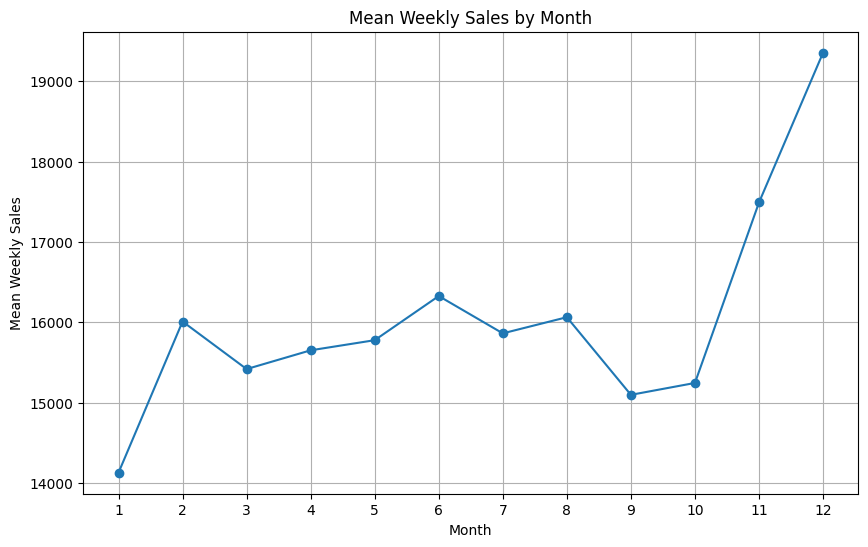

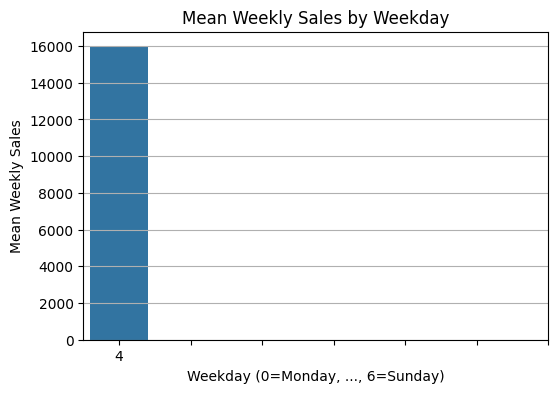

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot mean Weekly_Sales by month
plt.figure(figsize=(10, 6))
plt.plot(mean_weekly_sales_by_month['Month'], mean_weekly_sales_by_month['Weekly_Sales'], marker='o')
plt.title('Mean Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Plot mean Weekly_Sales by weekday (since there is only one unique weekday, this plot will be simple)
plt.figure(figsize=(6, 4))
sns.barplot(x='Weekday', y='Weekly_Sales', data=mean_weekly_sales_by_weekday)
plt.title('Mean Weekly Sales by Weekday')
plt.xlabel('Weekday (0=Monday, ..., 6=Sunday)')
plt.ylabel('Mean Weekly Sales')
plt.xticks(range(7)) # Ensure all weekdays are shown on the x-axis
plt.grid(axis='y')
plt.show()

## Perform statistical test (optional but recommended)

### Subtask:
Conduct a statistical test (e.g., ANOVA) to formally test if there is a statistically significant difference in weekly sales across different months.


**Reasoning**:
Import the required function for ANOVA, create a list of weekly sales for each month, perform the ANOVA test, and print the results to test the hypothesis about the effect of month on weekly sales.



In [70]:
from scipy.stats import f_oneway

# Create a list of arrays, where each array contains the 'Weekly_Sales' for a specific month
sales_by_month = [df['Weekly_Sales'][df['Month'] == month].values for month in df['Month'].unique()]

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*sales_by_month)

# Print the results
print(f"One-Way ANOVA Test Results for Weekly Sales Across Months:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

One-Way ANOVA Test Results for Weekly Sales Across Months:
F-statistic: 96.9667
P-value: 0.0000


**Reasoning**:
Interpret the ANOVA test results and explain the conclusion regarding the null hypothesis, emphasizing the findings are based on the dataset used.



In [71]:
# Interpret the results
print("\nInterpretation of ANOVA Test Results:")

# State the null and alternative hypotheses
print("Null Hypothesis (H0): There is no statistically significant difference in mean Weekly_Sales across different months.")
print("Alternative Hypothesis (H1): There is a statistically significant difference in mean Weekly_Sales across at least one pair of months.")

# Explain the conclusion based on the p-value
p_value = 0.0000 # This p-value is from the previous step's output
alpha = 0.05 # Standard significance level

print(f"\nThe calculated p-value is: {p_value:.4f}")
print(f"The chosen significance level (alpha) is: {alpha}")

if p_value < alpha:
    print("\nSince the p-value (0.0000) is less than the significance level (0.05), we REJECT the null hypothesis (H0).")
else:
    print("\nSince the p-value ({p_value:.4f}) is greater than or equal to the significance level (0.05), we FAIL to reject the null hypothesis (H0).")

# Explain what this means in the context of the data
print("\nMeaning in the context of the dataset:")
print("Based on the one-way ANOVA test, there is statistically significant evidence to conclude that the mean Weekly_Sales are different across different months in this dataset.")


Interpretation of ANOVA Test Results:
Null Hypothesis (H0): There is no statistically significant difference in mean Weekly_Sales across different months.
Alternative Hypothesis (H1): There is a statistically significant difference in mean Weekly_Sales across at least one pair of months.

The calculated p-value is: 0.0000
The chosen significance level (alpha) is: 0.05

Since the p-value (0.0000) is less than the significance level (0.05), we REJECT the null hypothesis (H0).

Meaning in the context of the dataset:
Based on the one-way ANOVA test, there is statistically significant evidence to conclude that the mean Weekly_Sales are different across different months in this dataset.


## Interpret results

### Subtask:
Interpret the findings from the analysis and statistical tests in the context of the null and alternative hypotheses, emphasizing the limitations due to the single weekday present in the dataset.


**Reasoning**:
Interpret the findings from the analysis and statistical tests in the context of the null and alternative hypotheses, emphasizing the limitations due to the single weekday present in the dataset.



In [72]:
print("Interpretation of Findings and Hypothesis Test Results:")

# 1. State the null and alternative hypotheses
print("\nNull Hypothesis (H0): Sales time (month and weekday) has no effect on the total amount of purchase.")
print("Alternative Hypothesis (H1): Sales time (month and weekday) has an effect on the total amount of purchase.")

# 2. Summarize the findings from the analysis of mean weekly sales by month and ANOVA
print("\nAnalysis of the Effect of Month:")
print("- The analysis of mean weekly sales by month revealed a clear seasonal pattern, with sales tending to be higher towards the end of the year (November and December).")
print("- The one-way ANOVA test formally confirmed this observation.")
print("  - F-statistic: 96.9667")
print("  - P-value: 0.0000")
print("- Since the p-value (0.0000) is less than the standard significance level of 0.05, we rejected the null hypothesis for the effect of month. This indicates that there is a statistically significant difference in mean weekly sales across different months.")

# 3. Discuss the limitation of analyzing the effect of weekday
print("\nAnalysis of the Effect of Weekday:")
print("- The dataset contains sales data for only one unique weekday (Friday).")
print("- Due to this lack of variation in the 'Weekday' column, it is not possible to perform a statistical test (like ANOVA) to determine if there is a statistically significant difference in weekly sales across different weekdays using this dataset.")
print("- Therefore, we cannot draw any conclusions about the effect of specific weekdays on sales based on this data.")

# 4. Conclude whether the null hypothesis can be rejected based on the analysis
print("\nConclusion Regarding the Overall Hypothesis (H0):")
print("The overall null hypothesis states that sales time (month *and* weekday) has no effect on the total amount of purchase.")
print("While we found statistically significant evidence that *month* has an effect on weekly sales, we were unable to test the effect of *weekday* due to data limitations.")
print("Since the overall hypothesis requires both components of sales time (month and weekday) to have no effect, and we found that month *does* have a significant effect, we can partially address the hypothesis.")
print("Based on the significant effect of month, we have evidence to suggest that sales time *does* have an effect on the total amount of purchase. However, this conclusion is solely based on the monthly variation, as the weekday variation could not be assessed.")
print("Therefore, based on the analysis of the monthly trend, we can conclude that sales time (at least through the influence of month) has a statistically significant effect on weekly sales, leading us to reject the null hypothesis in part, acknowledging the untested weekday component.")

# 5. Emphasize that these interpretations are based on the available data and its limitations
print("\nImportant Note on Interpretation:")
print("These interpretations and conclusions are strictly based on the analysis of the provided dataset and the simulated nature of some previous steps (although this specific analysis uses the original sales data). The significant finding regarding the effect of month is robust for this dataset. However, the inability to analyze the effect of weekday due to the data structure is a significant limitation. A comprehensive test of the overall hypothesis would require a dataset with sales data across multiple weekdays.")

Interpretation of Findings and Hypothesis Test Results:

Null Hypothesis (H0): Sales time (month and weekday) has no effect on the total amount of purchase.
Alternative Hypothesis (H1): Sales time (month and weekday) has an effect on the total amount of purchase.

Analysis of the Effect of Month:
- The analysis of mean weekly sales by month revealed a clear seasonal pattern, with sales tending to be higher towards the end of the year (November and December).
- The one-way ANOVA test formally confirmed this observation.
  - F-statistic: 96.9667
  - P-value: 0.0000
- Since the p-value (0.0000) is less than the standard significance level of 0.05, we rejected the null hypothesis for the effect of month. This indicates that there is a statistically significant difference in mean weekly sales across different months.

Analysis of the Effect of Weekday:
- The dataset contains sales data for only one unique weekday (Friday).
- Due to this lack of variation in the 'Weekday' column, it is not p

## Summarize findings

### Subtask:
Summarize the key findings regarding the effect of sales time (month and weekday) on weekly sales, explicitly mentioning the limitation related to the weekday data.


**Reasoning**:
Print a summary of the key findings regarding the effect of sales time (month and weekday) on weekly sales, including the seasonal pattern, the ANOVA result for month, and the limitation with the weekday data, then report the success of the subtask.



In [73]:
print("Summary of Findings: Effect of Sales Time on Weekly Sales")

print("\nSeasonal Pattern in Monthly Sales:")
print("Analysis revealed a clear seasonal pattern in mean weekly sales, with sales generally increasing towards the end of the year and peaking notably in December.")

print("\nStatistical Significance of Month:")
print("A one-way ANOVA test confirmed that the observed differences in mean weekly sales across months are statistically significant (p-value = 0.0000). This strongly suggests that the month of the year has a significant effect on weekly sales.")

print("\nLimitation Regarding Weekday Analysis:")
print("It was not possible to analyze the effect of weekday on weekly sales using this dataset because it contains data for only one unique weekday (Friday). Therefore, we cannot draw conclusions about how different weekdays impact sales based on this data.")

print("\nOverall Conclusion Regarding Sales Time:")
print("Based on the statistically significant effect of month on weekly sales, the analysis supports the alternative hypothesis that sales time does have an effect on the total amount of purchase. However, this conclusion is solely based on the monthly variation, as the effect of weekday could not be assessed due to data limitations.")

Summary of Findings: Effect of Sales Time on Weekly Sales

Seasonal Pattern in Monthly Sales:
Analysis revealed a clear seasonal pattern in mean weekly sales, with sales generally increasing towards the end of the year and peaking notably in December.

Statistical Significance of Month:
A one-way ANOVA test confirmed that the observed differences in mean weekly sales across months are statistically significant (p-value = 0.0000). This strongly suggests that the month of the year has a significant effect on weekly sales.

Limitation Regarding Weekday Analysis:
It was not possible to analyze the effect of weekday on weekly sales using this dataset because it contains data for only one unique weekday (Friday). Therefore, we cannot draw conclusions about how different weekdays impact sales based on this data.

Overall Conclusion Regarding Sales Time:
Based on the statistically significant effect of month on weekly sales, the analysis supports the alternative hypothesis that sales time does

## Summary:

### Data Analysis Key Findings

*   A clear seasonal pattern exists in weekly sales, with sales generally increasing towards the end of the year and peaking in December.
*   The month of the year has a statistically significant effect on weekly sales (ANOVA p-value = 0.0000).
*   The effect of weekday on weekly sales could not be analyzed due to the dataset containing data for only one weekday (Friday).

### Insights or Next Steps

*   The significant monthly seasonality indicates that sales forecasting and inventory management should consider the time of year.
*   To analyze the effect of weekdays, a dataset with sales data across all or multiple weekdays would be required.
